# Song Recommender
Recommends song based on one song.
1. If it's a popular song: recommend another popular song
2. If it's not a popular song: recommend simmilar song

## 1. Setup

### 1.1 Import Libraries

In [90]:
import pandas as pd
import pprint
from bs4 import BeautifulSoup

### 1.2 Load html file from website

In [157]:
import spotipy
import json
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

In [92]:
import secrets

#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= secrets.Client_ID,
                                                           client_secret= secrets.Client_Secret))
# top 10000 of all time

In [ ]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [204]:
def chunks_list(lst, n):
    """Yield successive n-sized chunks from lst."""
    list = []
    for i in range(0, len(lst), n):
        list.append(lst[i:i + n])
    return list

In [208]:
chunks_list([1,5,7,8,8,9,11], 2)

[[1, 5], [7, 8], [8, 9], [11]]

In [ ]:
def search_artist(list_artist, lim = 5):
    results = sp.search(q='Billie Eilish', limit = lim ,type = 'track', market="GB")
    return results

def get_song_info(list_songs):
    sp.tracks(list_songs)['tracks']

def get_audio_feautures(list_songs):
    list_chunked = chunks_list(list_songs,50)
    df = pd.DataFrame()
    for chunk in list_chunked:
        audio_ft_list = sp.audio_features(chunk)
        song_info_list = sp.tracks(chunk)['tracks']
        for song in audio_ft_list:
            song_info = {
                        'artists': [song_info_list[song]['artists'][0]['name']],
                        'name': [song_info_list[song]['name']]
                        }
            audio_ft_song = { key: [song[key]] for key in list(song.keys()) }
            df = df.append(pd.DataFrame(song_info))
            df = df.append(pd.DataFrame(audio_ft_song))
    return df





In [298]:
df = pd.DataFrame()
df


""


In [279]:
results = sp.search(q='Nils Frahm', limit = 2 ,type = 'track', market="GB")['tracks']['items']
print(len(results))
print(results[0]['id'])
print(results[1]['id'])
list_songs = []
results = sp.search(q='Nils Frahm', limit = 2 ,type = 'track', market="GB")['tracks']['items']
for item in results:
  #  print(item)
    list_songs.append(item['id'])
list_songs


2
7pLoI3XJLM67CGKAnOf5M5
6cW3Rxm1sZpMuQinmiKjkG


['7pLoI3XJLM67CGKAnOf5M5', '6cW3Rxm1sZpMuQinmiKjkG']

In [288]:
def search_artists_songs(list_artist, lim = 50):
    '''
    
    '''
    list_songs = []
    for artist in list_artist:
        results = sp.search(q=artist, limit = lim ,type = 'track', market="GB")['tracks']['items']
        for item in results:
            list_songs.append(item['id'])
    return list_songs

def get_song_info(list_songs):
    sp.tracks(list_songs)['tracks']

def get_audio_feautures(list_songs):
    list_chunked = chunks_list(list_songs,50)
    df = pd.DataFrame()
    for chunk in list_chunked:
        audio_ft_list = sp.audio_features(chunk)
        song_info_list = sp.tracks(chunk)['tracks']
        for song in range(len(audio_ft_list)):
            song_info = {
                        'artists': [song_info_list[song]['artists'][0]['name']],
                        'name': [song_info_list[song]['name']]
                        }
            audio_ft_song = { key: [audio_ft_list[song][key]] for key in list(audio_ft_list[song].keys()) }
            df = df.append(pd.DataFrame({**song_info, **audio_ft_song}))
            print(df.columns)
    return df





In [289]:
list_songs =['https://open.spotify.com/track/4RVwu0g32PAqgUiJoXsdF8','spotify:track:2Fxmhks0bxGSBdJ92vM42m']
list_artists = ['jhj,v mnv','Bad']#
#sp.tracks(list_songs)['tracks'][0]['artists'][0]['name']
#get_audio_feautures(list_songs)
search_artists_songs(list_artists)
get_audio_feautures(list_songs)


Index(['artists', 'name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')
Index(['artists', 'name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')


,artists,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Billie Eilish,Happier Than Ever,0.332,0.225,0,-8.697,1,0.0348,0.767,0.00349,0.128,0.297,81.055,audio_features,4RVwu0g32PAqgUiJoXsdF8,spotify:track:4RVwu0g32PAqgUiJoXsdF8,https://api.spotify.com/v1/tracks/4RVwu0g32PAq...,https://api.spotify.com/v1/audio-analysis/4RVw...,298899,3
0,Billie Eilish,bad guy,0.701,0.425,7,-10.965,1,0.3750,0.328,0.13000,0.100,0.562,135.128,audio_features,2Fxmhks0bxGSBdJ92vM42m,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4


In [ ]:
'disc_number': 1,
 'duration_ms': 298899,
 'explicit': True,
 'external_ids': {'isrc': 'USUM72105936'},
 'external_urls': {'spotify': 'https://open.spotify.com/track/4RVwu0g32PAqgUiJoXsdF8'},
 'href': 'https://api.spotify.com/v1/tracks/4RVwu0g32PAqgUiJoXsdF8',
 'id': '4RVwu0g32PAqgUiJoXsdF8',
 'is_local': False,
 'name': 'Happier Than Ever',
 'popularity': 93,
 'preview_url': None,
 'track_number': 15,
 'type': 'track',
 'uri': 'spotify:track:4RVwu0g32PAqgUiJoXsdF8'

In [178]:
df = pd.DataFrame()
audio_ft_dic = {'danceability': 0.332, 'energy': 0.225, 'key': 0, 'loudness': -8.697, 'mode': 1, 'speechiness': 0.0348, 'acousticness': 0.767, 'instrumentalness': 0.00349, 'liveness': 0.128, 'valence': 0.297, 'tempo': 81.055, 'type': 'audio_features', 'id': '4RVwu0g32PAqgUiJoXsdF8', 'uri': 'spotify:track:4RVwu0g32PAqgUiJoXsdF8', 'track_href': 'https://api.spotify.com/v1/tracks/4RVwu0g32PAqgUiJoXsdF8', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4RVwu0g32PAqgUiJoXsdF8', 'duration_ms': 298899, 'time_signature': 3}
audio_ft_dic

{'danceability': 0.332,
 'energy': 0.225,
 'key': 0,
 'loudness': -8.697,
 'mode': 1,
 'speechiness': 0.0348,
 'acousticness': 0.767,
 'instrumentalness': 0.00349,
 'liveness': 0.128,
 'valence': 0.297,
 'tempo': 81.055,
 'type': 'audio_features',
 'id': '4RVwu0g32PAqgUiJoXsdF8',
 'uri': 'spotify:track:4RVwu0g32PAqgUiJoXsdF8',
 'track_href': 'https://api.spotify.com/v1/tracks/4RVwu0g32PAqgUiJoXsdF8',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4RVwu0g32PAqgUiJoXsdF8',
 'duration_ms': 298899,
 'time_signature': 3}

In [179]:
df = pd.DataFrame({'danceability': [0.332], 'energy': [0.225]})

In [174]:
df = df.append(pd.DataFrame({'danceability': [0.332], 'energy': [0.225]}))
df

,danceability,energy
0,0.332,0.225
0,0.332,0.225


In [175]:
list_songs =['https://open.spotify.com/track/4RVwu0g32PAqgUiJoXsdF8','spotify:track:2Fxmhks0bxGSBdJ92vM42m']
get_audio_feautures(list_songs)
#sp.audio_features(list_songs)

TypeError: list indices must be integers or slices, not dict

In [ ]:

# my_dict = sp.audio_features(song["tracks"]["items"][0]["uri"])[0] # you can provide a list of uri's

# print(my_dict)
# my_dict_new = { key: [my_dict[key]] for key in list(my_dict.keys()) }
# #my_dict_new['name'] = [song["tracks"]["items"][0]['name']]
# print(my_dict_new)

# pd.DataFrame(my_dict_new)

# my_artists = ['Placebo','Marylin Manson','Janis Joplin']

# my_dict = {}
# #for artist in my_artists:
# #    #result = sp.search(q=artist, limit= 50)
# #    my_dict[artist] = sp.search(q=artist, limit= 50)

# my_dict = {artist: sp.search(q=artist, limit= 50,market="GB") for artist in my_artists}
# #my_dict
# my_dict.keys()

In [300]:
import pandas as pd
import spotipy


In [303]:
test = ['3RMuJ4qdkgs71mBNbPpZu0',
 '7pj8Iw9leffePdIHypG8uU',
 '7fR4QS2A3b69J7lPDESaJs',
 '26UAHeMVqrtWcoSXyo5qlq']

In [306]:

def get_audio_feautures(list_songs):
    '''
    Get DataFrame with song-info and -audiofeatures for a list of song-IDs.

    Parameters
    ----------
    list_songs : list
        Songs to save song-info and -audiofeatures

    Returns
    -------
    Dataframe: 
        columns = ['artists', 'name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature']        
    '''
    print('start')
    list_chunked = chunks_list(list_songs,50)
    print(list_chunked)
    df = pd.DataFrame()
    counter = 0
    for chunk in tqdm(list_chunked):
        counter += 1
        print(chunk)
        # try:    
        #     audio_ft_list = sp.audio_features(chunk)
        #     song_info_list = sp.tracks(chunk)['tracks']
        #     print(song_info_list,audio_ft_list)
        #     for song in tqdm(range(len(audio_ft_list))):
        #         print(song_info_list[song],audio_ft_list[song])
        #         try:
        #             if len(song_info_list[song]) >= 0 and len(audio_ft_list[song]) >= 0:
        #                 print(song_info_list[song],audio_ft_list[song])
        #                 song_info = {
        #                         'artists': [song_info_list[song]['artists'][0]['name']],
        #                         'name': [song_info_list[song]['name']]
        #                         }
        #                 try:
        #                     audio_ft_song = { key: [audio_ft_list[song][key]] for key in list(audio_ft_list[song].keys()) }
        #                     df = df.append(pd.DataFrame({**song_info, **audio_ft_song}))
        #                 except:
        #                     print('error in audio_ft',audio_ft_list[song])
        #                     print('key:',song)
        #                     continue
        #         except:
        #             print('error in song_info:',song_info_list[song])
        #             print('key:',song)   
        #             continue
        # except:
        #     print('Problems with chunk:',chunk,'counter')
        #     continue
    return df

In [307]:
get_audio_feautures(test)

start
[['3RMuJ4qdkgs71mBNbPpZu0', '7pj8Iw9leffePdIHypG8uU', '7fR4QS2A3b69J7lPDESaJs', '26UAHeMVqrtWcoSXyo5qlq']]


100%|██████████| 1/1 [00:00<?, ?it/s]

['3RMuJ4qdkgs71mBNbPpZu0', '7pj8Iw9leffePdIHypG8uU', '7fR4QS2A3b69J7lPDESaJs', '26UAHeMVqrtWcoSXyo5qlq']


""


In [6]:
import numpy as np

In [9]:
list = [1.78,
1.78, 
1.78,
1.78,
1.825, 






]

In [10]:
np.mean(list)

1.8116666666666665

In [8]:
import pandas as pd

In [36]:
asd = pd.read_csv('data/list_10000words.csv')['a']
asd[9998]

'zus'

In [34]:
asd

0              aa
1             aaa
2           aaron
3              ab
4       abandoned
          ...    
9994         zope
9995       zshops
9996           zu
9997          zum
9998          zus
Name: a, Length: 9999, dtype: object

In [63]:
with open('data/speeches.txt','r',encoding='utf-8':) as f:
	listl=[]
	for line in f:
		strip_lines=line.strip()
		listli=strip_lines.split()
		print(listli)
		m=listl.append(listli)
	print(listl)

['ï»¿SPEECH', '1']
[]
[]
['...Thank', 'you', 'so', 'much.', "That's", 'so', 'nice.', "Isn't", 'he', 'a', 'great', 'guy.', 'He', "doesn't", 'get', 'a', 'fair', 'press;', 'he', "doesn't", 'get', 'it.', "It's", 'just', 'not', 'fair.', 'And', 'I', 'have', 'to', 'tell', 'you', "I'm", 'here,', 'and', 'very', 'strongly', 'here,', 'because', 'I', 'have', 'great', 'respect', 'for', 'Steve', 'King', 'and', 'have', 'great', 'respect', 'likewise', 'for', 'Citizens', 'United,', 'David', 'and', 'everybody,', 'and', 'tremendous', 'resect', 'for', 'the', 'Tea', 'Party.', 'Also,', 'also', 'the', 'people', 'of', 'Iowa.', 'They', 'have', 'something', 'in', 'common.', 'Hard-working', 'people.', 'They', 'want', 'to', 'work,', 'they', 'want', 'to', 'make', 'the', 'country', 'great.', 'I', 'love', 'the', 'people', 'of', 'Iowa.', 'So', "that's", 'the', 'way', 'it', 'is.', 'Very', 'simple.']
['With', 'that', 'said,', 'our', 'country', 'is', 'really', 'headed', 'in', 'the', 'wrong', 'direction', 'with', 'a', 'p

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 4547: character maps to <undefined>

In [3]:
import re
def txt_to_list(path):
    with open(path,'r',encoding='utf-8') as f:
        word_list = []
        for line in f:
            for word in line.split():
                word_list.append(re.sub('[^A-Za-z0-9]+', '', word))
#        word_list=[word for line in f for word in line.split()]
    return list(set(word_list))
path = 'data/speeches.txt'

In [5]:
len(txt_to_list(path))

7912

In [59]:
def read_words(inputfile):
    with open(inputfile, 'r') as f:
        while True:
            buf = f.read(10240)
            if not buf:
                break

            # make sure we end on a space (word boundary)
            while not str.isspace(buf[-1]):
                ch = f.read(1)
                if not ch:
                    break
                buf += ch

            words = buf.split()
            for word in words:
                yield word
        yield '' #handle the scene that the file is empty

if __name__ == "__main__":
    for word in read_words('./very_large_file.txt'):
        process(word)

<_io.TextIOWrapper name='data/speeches.txt' mode='r' encoding='cp1252'>

In [ ]:
X_scaled[X_scaled['tempo'] >= 2].index[5]

89

In [ ]:
X_scaled.loc[1]

danceability       -2.083418
energy             -0.603947
key                 1.610912
loudness           -0.349107
mode                0.763400
speechiness        -0.538341
acousticness        0.228960
instrumentalness   -0.250796
liveness           -0.727514
valence            -0.966230
tempo               2.068500
time_signature     -2.253136
Name: 1, dtype: float64

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

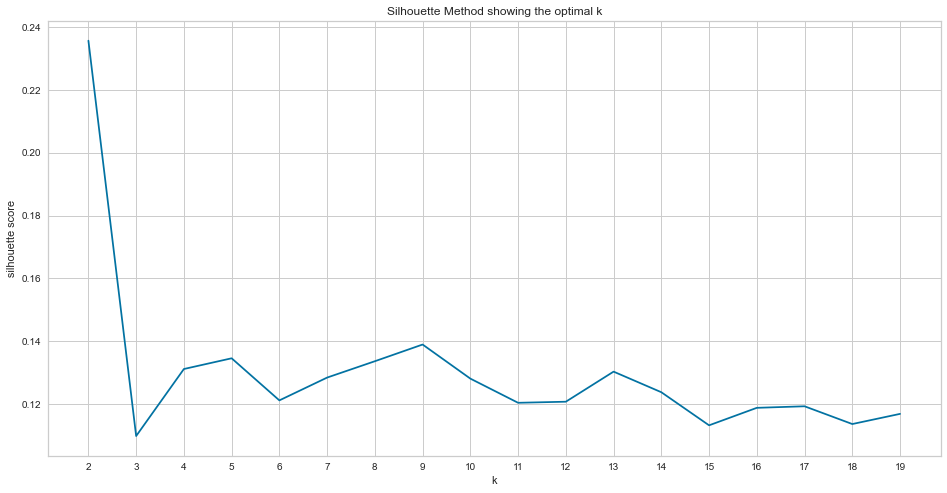

In [ ]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

The greater the Silouhette, the greater the separation between the clusters, In other words, the clusters will be more defined.

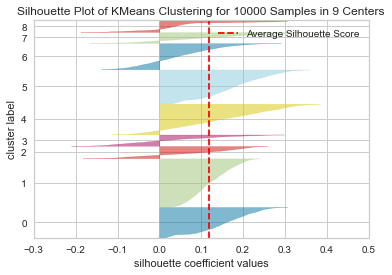

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 10000 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(9, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure